## Importing the required libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Load the Titanic dataset

In [4]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Define the features and targets

In [6]:
features = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()
targets = titanic_data['Survived'].copy()

## Impute missing values in the age and fare columns using mean imputation

In [8]:
imputer = SimpleImputer(strategy='mean')
features[['Age', 'Fare']] = imputer.fit_transform(features[['Age', 'Fare']])

## Convert categorical features to numerical using one-hot encoding

In [10]:
features = pd.get_dummies(features, columns=['Pclass', 'Sex', 'Embarked'])
features

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.50000,0,0,7.8292,False,False,True,False,True,False,True,False
1,47.00000,1,0,7.0000,False,False,True,True,False,False,False,True
2,62.00000,0,0,9.6875,False,True,False,False,True,False,True,False
3,27.00000,0,0,8.6625,False,False,True,False,True,False,False,True
4,22.00000,1,1,12.2875,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,8.0500,False,False,True,False,True,False,False,True
414,39.00000,0,0,108.9000,True,False,False,True,False,True,False,False
415,38.50000,0,0,7.2500,False,False,True,False,True,False,False,True
416,30.27259,0,0,8.0500,False,False,True,False,True,False,False,True


## Split the data into features and targets

In [12]:
XS = features.values.astype('float32')
YS = targets.values.astype('float32')

## Split the data into train and test sets

In [14]:
x_train, x_test, y_train, y_test = train_test_split(XS, YS, test_size=0.125, random_state=42)

## Define the Keras model

In [16]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\bikra\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

## Train the model on the training data

In [20]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=25, verbose=2)

Epoch 1/50
12/12 - 1s - 104ms/step - accuracy: 0.5034 - loss: 1.0557 - val_accuracy: 0.6849 - val_loss: 0.7495
Epoch 2/50
12/12 - 0s - 6ms/step - accuracy: 0.7021 - loss: 0.6577 - val_accuracy: 0.6849 - val_loss: 0.6870
Epoch 3/50
12/12 - 0s - 10ms/step - accuracy: 0.7158 - loss: 0.6024 - val_accuracy: 0.7397 - val_loss: 0.6146
Epoch 4/50
12/12 - 0s - 10ms/step - accuracy: 0.7534 - loss: 0.5478 - val_accuracy: 0.6575 - val_loss: 0.6137
Epoch 5/50
12/12 - 0s - 10ms/step - accuracy: 0.7842 - loss: 0.5291 - val_accuracy: 0.6712 - val_loss: 0.5801
Epoch 6/50
12/12 - 0s - 7ms/step - accuracy: 0.7637 - loss: 0.5177 - val_accuracy: 0.6849 - val_loss: 0.6495
Epoch 7/50
12/12 - 0s - 8ms/step - accuracy: 0.7534 - loss: 0.5460 - val_accuracy: 0.7260 - val_loss: 0.5412
Epoch 8/50
12/12 - 0s - 10ms/step - accuracy: 0.7260 - loss: 0.5717 - val_accuracy: 0.6575 - val_loss: 0.5764
Epoch 9/50
12/12 - 0s - 12ms/step - accuracy: 0.7671 - loss: 0.4700 - val_accuracy: 0.6986 - val_loss: 0.5080
Epoch 10/50


## Evaluate the model on the testing data

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 1.0


## Print the loss and accuracy after each epoch during training

In [24]:
for epoch, metrics in enumerate(history.history):
    print('Epoch', epoch+1, metrics)

Epoch 1 accuracy
Epoch 2 loss
Epoch 3 val_accuracy
Epoch 4 val_loss


## Checking loss per epoch

In [26]:
loss=history.history['loss']
validation_loss=history.history['val_loss']

## Checking overfitting

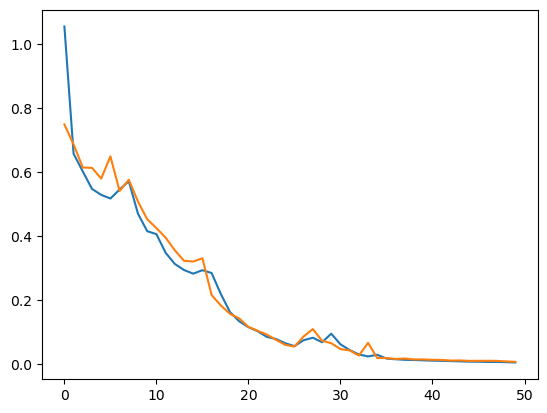

In [28]:
plt.plot(loss)
plt.plot(validation_loss)
plt.show()

## Making predictions on the test set

In [30]:
abs_prediction = model.predict(x_test)
prediction = (abs_prediction > 0.5).astype("int64")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


## Print both the actual test label and predicted value for comparison

In [32]:
print(prediction.flatten())
print(y_test)

[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1]
[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 1.]


## Creating a prediction function

In [34]:
def neural_net_predictions(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)

## Classification report of the Squential network model

In [36]:
print(classification_report(y_test, neural_net_predictions(model, x_test), target_names=['Not Survived', 'Survived']))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00        29
    Survived       1.00      1.00      1.00        24

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



## Predicting for a random instance

In [38]:
instance = {'Age':27, 
            'SibSp':1, 
            'Parch':2, 
            'Fare':52, 
            'Pclass_1':False,
            'Pclass_2':True,
            'Pclass_3':False, 
            'Sex_female':True,
            'Sex_male':False,
            'Embarked_C':False,	
            'Embarked_Q':False,	
            'Embarked_S':True}

In [39]:
instance_df = pd.DataFrame([instance])
instance_df = instance_df.astype(int)

In [40]:
abs_prediction = model.predict(instance_df)
prediction = (abs_prediction.flatten() > 0.5).astype(int)
print(f'Absolute Predicted: {abs_prediction[0][0]}')
print(f'Prediction: {prediction[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Absolute Predicted: 0.9844430088996887
Prediction: 1
